### Hierarchical generation of candidate structures from space group, composition, and lattice parameters.

We will use PbSO4 (spg: 62) as an example for structure generation

In [1]:
from hsg import HierarchicalStructureGeneration
from utils import get_minimum_distances

Here is some information on PbSO4:

In [2]:
spg=62
c=6.959; a=8.482; b=5.398; alpha=90; beta=90; gamma=90 
atoms = [(4,'Pb'), (16,'O'), (4,'S')]
# General ovelap threshold:
d_tol = 1.2 
# Specific thresholds:
d_mins = {'Pb': 1.5*2, 'S': 1.70*2, 'O': 2.1, 'O-Pb': 2.4, 'Pb-S': 3.0}

Let's look at the convenience distance dictionary generator to see if our choices make sense.

In [3]:
get_minimum_distances('PbSO4', glue='O', polya=['S','O'])

{'Pb': 3.195545009975325,
 'Pb-S': 2.391605958780626,
 'O-Pb': 2.0251249999999996,
 'S': 1.5876669075859264,
 'O-S': 1.249925,
 'O': 2.142}

In [4]:
hsg = HierarchicalStructureGeneration(spg=spg, a=a, b=b, c=c, 
                                      alpha=alpha, beta=beta, 
                                      gamma=gamma, atoms=atoms, 
                                      d_tol=d_tol, d_mins=d_mins, 
                                      use_asu=True)

`HierarchicalStructureGeneration` can confine the search to the asymmetric unit parallelpiped of the unit cell for more efficient searching.

In [5]:
hsg.ppipe

([[0, 0.5], [0, 0.25], [0, 1]], [[True, False], [True, True], [True, False]])

We have 35 unique Wyckoff combinations that satisfy the number of atoms:

In [6]:
print(len(hsg.filter_combinations))

35


In [7]:
hsg.filter_combinations

[(((1, 4),), ((1, 4),), ((0, 8), (0, 8))),
 (((1, 4),), ((2, 4),), ((0, 8), (0, 8))),
 (((1, 4),), ((3, 4),), ((0, 8), (0, 8))),
 (((2, 4),), ((1, 4),), ((0, 8), (0, 8))),
 (((2, 4),), ((3, 4),), ((0, 8), (0, 8))),
 (((3, 4),), ((1, 4),), ((0, 8), (0, 8))),
 (((3, 4),), ((2, 4),), ((0, 8), (0, 8))),
 (((1, 4),), ((1, 4),), ((0, 8), (1, 4), (1, 4))),
 (((1, 4),), ((1, 4),), ((0, 8), (1, 4), (2, 4))),
 (((1, 4),), ((1, 4),), ((0, 8), (1, 4), (3, 4))),
 (((1, 4),), ((1, 4),), ((0, 8), (2, 4), (3, 4))),
 (((1, 4),), ((2, 4),), ((0, 8), (1, 4), (1, 4))),
 (((1, 4),), ((2, 4),), ((0, 8), (1, 4), (3, 4))),
 (((1, 4),), ((3, 4),), ((0, 8), (1, 4), (1, 4))),
 (((1, 4),), ((3, 4),), ((0, 8), (1, 4), (2, 4))),
 (((2, 4),), ((1, 4),), ((0, 8), (1, 4), (1, 4))),
 (((2, 4),), ((1, 4),), ((0, 8), (1, 4), (3, 4))),
 (((2, 4),), ((3, 4),), ((0, 8), (1, 4), (1, 4))),
 (((3, 4),), ((1, 4),), ((0, 8), (1, 4), (1, 4))),
 (((3, 4),), ((1, 4),), ((0, 8), (1, 4), (2, 4))),
 (((3, 4),), ((2, 4),), ((0, 8), (1,

Just as an example, let's generate structures for 0, 1, 7 and 28 (7 happens to contain the actual structure). We will use a point density of 1.2 points per angstrom. This may take a few minutes

In [8]:
%%time
results = hsg.get_structure_grids(1.2, [0,1,7,28])

0 (((1, 4),), ((1, 4),), ((0, 8), (0, 8)))
0.(((1, 4),), ((1, 4),), ((0, 8), (0, 8))): Elem self loop: Pb
Using 6 points in direction 0
Using 9 points in direction 2



0.(((1, 4),), ((1, 4),), ((0, 8), (0, 8))): Elem self loop: S
Using 6 points in direction 0
Using 9 points in direction 2



0.(((1, 4),), ((1, 4),), ((0, 8), (0, 8))):  Elem pairs loop: S



0.(((1, 4),), ((1, 4),), ((0, 8), (0, 8))): Elem self loop: O
Using 6 points in direction 0
Using 2 points in direction 1
Using 9 points in direction 2



0.(((1, 4),), ((1, 4),), ((0, 8), (0, 8))):  Elem pairs loop: O



1 (((1, 4),), ((2, 4),), ((0, 8), (0, 8)))
1.(((1, 4),), ((2, 4),), ((0, 8), (0, 8))): Elem self loop: Pb
Using 6 points in direction 0
Using 9 points in direction 2



1.(((1, 4),), ((2, 4),), ((0, 8), (0, 8))): Elem self loop: S



1.(((1, 4),), ((2, 4),), ((0, 8), (0, 8))):  Elem pairs loop: S



1.(((1, 4),), ((2, 4),), ((0, 8), (0, 8))): Elem self loop: O
Using 6 points in direction 0
Using 2 points in direction 1
Using 9 points in direction 2



1.(((1, 4),), ((2, 4),), ((0, 8), (0, 8))):  Elem pairs loop: O



7 (((1, 4),), ((1, 4),), ((0, 8), (1, 4), (1, 4)))
7.(((1, 4),), ((1, 4),), ((0, 8), (1, 4), (1, 4))): Elem self loop: Pb
Using 6 points in direction 0
Using 9 points in direction 2



7.(((1, 4),), ((1, 4),), ((0, 8), (1, 4), (1, 4))): Elem self loop: S
Using 6 points in direction 0
Using 9 points in direction 2



7.(((1, 4),), ((1, 4),), ((0, 8), (1, 4), (1, 4))):  Elem pairs loop: S



7.(((1, 4),), ((1, 4),), ((0, 8), (1, 4), (1, 4))): Elem self loop: O
Using 6 points in direction 0
Using 2 points in direction 1
Using 9 points in direction 2
Using 6 points in direction 0
Using 9 points in direction 2



7.(((1, 4),), ((1, 4),), ((0, 8), (1, 4), (1, 4))):  Elem pairs loop: O



28 (((1, 4),), ((3, 4),), ((1, 4), (1, 4), (1, 4), (2, 4)))
28.(((1, 4),), ((3, 4),), ((1, 4), (1, 4), (1, 4), (2, 4))): Elem self loop: Pb
Using 6 points in direction 0
Using 9 points in direction 2



28.(((1, 4),), ((3, 4),), ((1, 4), (1, 4), (1, 4), (2, 4))): Elem self loop: S



28.(((1, 4),), ((3, 4),), ((1, 4), (1, 4), (1, 4), (2, 4))):  Elem pairs loop: S



28.(((1, 4),), ((3, 4),), ((1, 4), (1, 4), (1, 4), (2, 4))): Elem self loop: O
Using 6 points in direction 0
Using 9 points in direction 2



28.(((1, 4),), ((3, 4),), ((1, 4), (1, 4), (1, 4), (2, 4))):  Elem pairs loop: O



CPU times: user 5min 38s, sys: 1min 48s, total: 7min 26s
Wall time: 5min 53s


Let's see how many structures are generated for each combination:

In [11]:
[len(i) for i in results]

[300, 0, 13898, 0]

For combination 7 (or the 3rd entry in results), let's do a structure comparison to the original:

In [13]:
from pymatgen import Structure
original_str = Structure.from_file('PbSO4_AMS_DATA.cif')
from pymatgen.analysis.structure_matcher import StructureMatcher
sm = StructureMatcher(ltol=0.5, stol=0.5, angle_tol=20)

Let's get pymatgen.Structure objects from our coordinates, and comapre those to the original structure. This will take a while...

In [14]:
_results = results[2] # Just doing it for the correct combination for demonstration purposes
species = ['Pb']*4+['S']*4+['O']*16
scores=[]
for m in range(len(_results)):
    sites = []
    for j in [list(i) for i in _results[m]]:
        for k in j:
            sites.append(k)
    s = Structure(hsg.lattice, species, sites)
    if m%100==0:
        print(m,' ', end='')
    scores.append( sm.get_rms_dist(s, original_str) )

0  100  200  300  400  500  600  700  800  900  1000  1100  1200  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300  2400  2500  2600  2700  2800  2900  3000  3100  3200  3300  3400  3500  3600  3700  3800  3900  4000  4100  4200  4300  4400  4500  4600  4700  4800  4900  5000  5100  5200  5300  5400  5500  5600  5700  5800  5900  6000  6100  6200  6300  6400  6500  6600  6700  6800  6900  7000  7100  7200  7300  7400  7500  7600  7700  7800  7900  8000  8100  8200  8300  8400  8500  8600  8700  8800  8900  9000  9100  9200  9300  9400  9500  9600  9700  9800  9900  10000  10100  10200  10300  10400  10500  10600  10700  10800  10900  11000  11100  11200  11300  11400  11500  11600  11700  11800  11900  12000  12100  12200  12300  12400  12500  12600  12700  12800  12900  13000  13100  13200  13300  13400  13500  13600  13700  13800  

Let's see how the distance scores to original structure are distributed

(array([   0.,    0.,   24.,  136.,  390.,  892., 1618., 2124., 2182.,
        1925.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

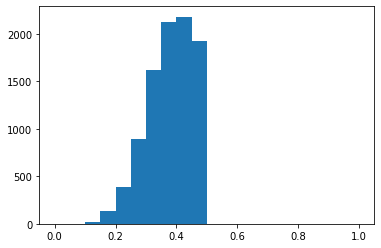

In [15]:
import matplotlib.pyplot as plt
_scores = [(scores[i][0],i) for i in range(len(scores)) if scores[i] is not None]
plt.hist([i[0] for i in _scores], range=(0,1), bins=20)

This is the closest structure's score:

In [16]:
min(_scores)

(0.1304195902535959, 1448)

We can save this structure we found and inspect.

In [17]:
species = ['Pb']*4+['S']*4+['O']*16
sites = []
for j in [list(i) for i in _results[min(_scores)[1]]]:
    for k in j:
        sites.append(k)
s = Structure(hsg.lattice, species, sites)
s.to('poscar','PbSO4_RMS0.13.vasp')

You will see that the structure looks quite similar to the original!